# Separation of Variables in spherical coordinates

with the Laplace equation in spherical coordiantes:

$$ \frac{1}{r^2}\frac{\partial}{\partial r}\left (r^2 \frac{\partial V}{\partial r}\right )+ 
   \frac{1}{r^2\sin \theta}\frac{\partial}{\partial \theta} \left (\sin \theta \frac{\partial V}{\partial \theta}\right )+
   \frac{1}{r^2\sin^2 \theta}\frac{\partial^2 V}{\partial \phi^2}
   =0
$$

we are assuming azimuthal symmetry here and ths V is independent of $\phi$, even though the general care is solveable as well and it simplifies to:

$$ \frac{\partial}{\partial r}\left (r^2 \frac{\partial V}{\partial r}\right )+ 
   \frac{1}{\sin \theta}\frac{\partial}{\partial \theta} \left (\sin \theta \frac{\partial V}{\partial \theta}\right )
   =0
$$

Again we are looking for solutions as products:
    
$$ V(r,\theta) = R(r)\Theta(\theta)$$

Separating of variables gives us:
    
$$ \frac 1 R \frac{\partial}{\partial r}\left (r^2 \frac{\partial R}{\partial r}\right )= 
   -\frac{1}{\Theta\sin \theta}\frac{\partial}{\partial \theta} \left (\sin \theta \frac{\partial \Theta}{\partial \theta}\right ) $$
   
which can only be equal if the left side and the right side are constants (since they each only depend on $r$ or $\theta$ respectively)

So we are setting constants for the left side:

    
$$ \frac 1 R \frac{\partial}{\partial r}\left (r^2 \frac{\partial R}{\partial r}\right )=
   l(l+1)$$
   
and for the right side:
$$ \frac{1}{\Theta\sin \theta}\frac{\partial}{\partial \theta} \left (\sin \theta \frac{\partial \Theta}{\partial \theta}\right ) = - l(l+1) $$

and thus have converted a PDE in two ODEs.

### Solving the left side:

In [1]:
from sympy.interactive import printing # use latex for printing
printing.init_printing(use_latex=True)
from sympy import Function, dsolve, Eq, Derivative, sin, cos, symbols # import necessary methods
from sympy.abc import theta # import variables

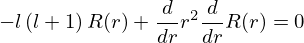

In [2]:
r, l = symbols('r l',positive=True)
R = Function('R',real=True)
s1_ode = Eq(Derivative((r**2*Derivative(R(r),r,1)), r, 1)-l*(l+1)*R(r))
s1_ode

In [3]:
sol1 = dsolve(s1_ode, R(r))
sol1

### Solving the right side

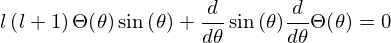

In [4]:
t, l = symbols('theta l')
T = Function('Theta',real=True)
s2_ode = Eq(Derivative(sin(t)*Derivative(T(t),t,1), t, 1)+l*(l+1)*sin(t)*T(t))
s2_ode

In [5]:
sol2 = dsolve(s2_ode, T(t))
sol2

NotImplementedError: solve: Cannot solve l*(l + 1)*Theta(theta)*sin(theta) + sin(theta)*Derivative(Theta(theta), (theta, 2)) + cos(theta)*Derivative(Theta(theta), theta)

### Legendre Polynomials

In [6]:
from sympy.plotting import plot
from sympy import legendre, pi
%matplotlib inline

In [7]:
t = symbols('theta',positive=True)
P0 = lambda t: legendre(0,t)
P1 = lambda t: legendre(1,t)
P2 = lambda t: legendre(2,t)
P3 = lambda t: legendre(3,t)
P4 = lambda t: legendre(4,t)

In [8]:
P0(cos(t))

In [9]:
P1(cos(t))

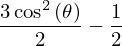

In [10]:
P2(cos(t))

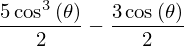

In [11]:
P3(cos(t))

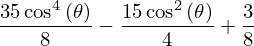

In [12]:
P4(cos(t))

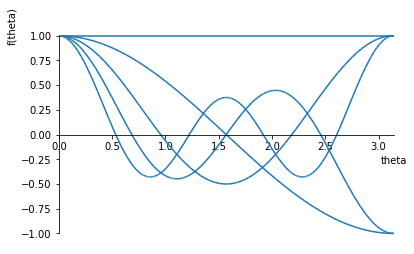

In [13]:
plot(P0(cos(t)),P1(cos(t)),P2(cos(t)),P3(cos(t)),P4(cos(t)),(t,0,pi))

Legendre polynomials with the argument $\cos\theta$ are the solutions for the right side:

$$ \Theta(\theta) = P_l(\cos\theta) $$

Which gives the most general separabe solution to Laplace equation (for physics):

$$ V(r,\theta)=\sum_{l=0}^{\infty}\left (A_l r^l+\frac{B_l}{r^{l+1}}\right ) P_l(\cos\theta) $$